In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
import glob as glob
from scipy.interpolate import interp1d

In [2]:
relic = pd.read_csv('Relic_WIMP_Abundance.tsv',sep='\s+')

In [3]:
dSphNames = ['CBe','DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','Wil1']
channels = ['b','Tau']
profiles=['Einasto','Burkert']

In [9]:
df_list = []
for name in dSphNames:
    for profile in profiles:
    
        filename = 'sv_limits_files/'+name+'_'+profile+'_Annichilation.csv'
        df_list.append(pd.read_csv(filename))
        
df = pd.concat(df_list, ignore_index=True)
df.drop_duplicates(inplace=True)

# Rescale mass column by 1/1000 to have it in TeV
df['mass'] = df['mass'] / 1000

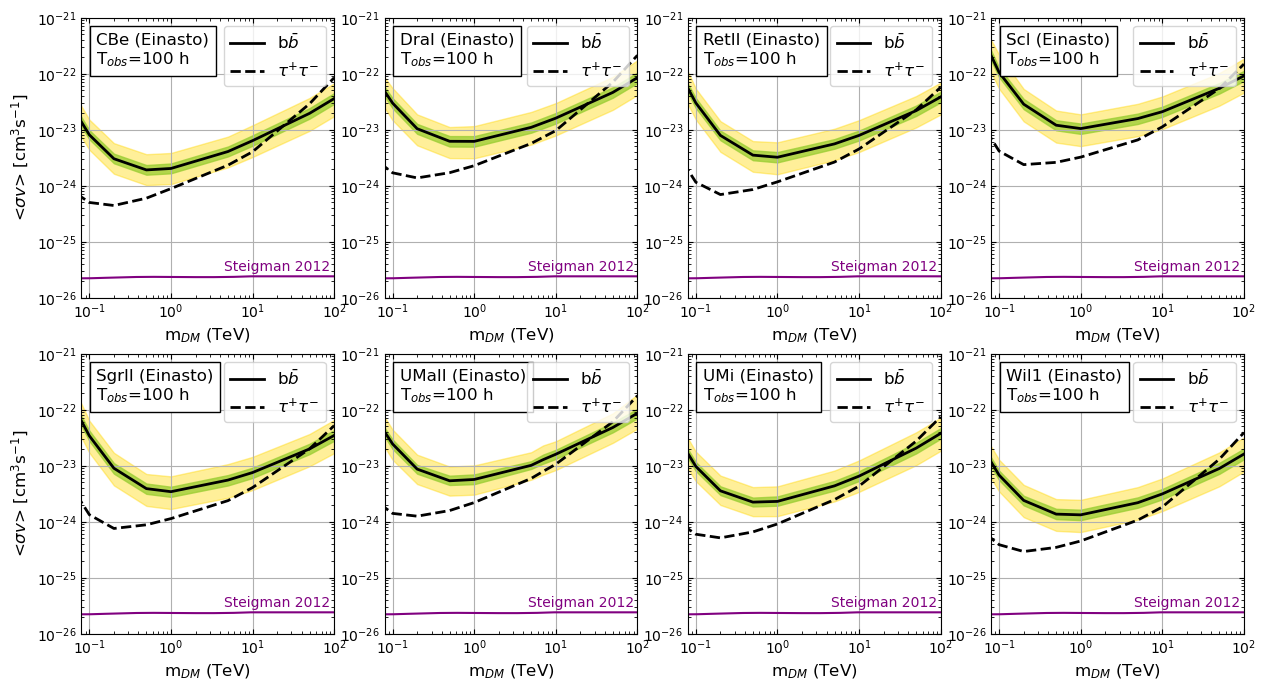

In [14]:
fig = plt.figure(figsize=(15, 8))

profile = 'Einasto'

contador = 1
for name in dSphNames:
    
    plt.subplot(2, 4, contador)

    contador = contador + 1
    
    scale = 1
    mask_dw = (df['quantile'] == 0.05) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    mask_up = (df['quantile'] == 0.95) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    plt.fill_between(df[mask_dw]['mass'],
                     df[mask_up]['sigma_v']*scale,
                     df[mask_dw]['sigma_v']*scale, color='gold', alpha=0.4)


    mask_dw = (df['quantile'] == 0.32) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    mask_up = (df['quantile'] == 0.68) & (df['name']==name) & (df['ch']=='b') & (df['profile']==profile)
    plt.fill_between(df[mask_dw]['mass'],
                     df[mask_up]['sigma_v']*scale,
                     df[mask_dw]['sigma_v']*scale, color='yellowgreen', alpha=0.75)
    
    
    
    mask = (df['quantile'] == 0.5) & (df['name']==name) & (df['profile']==profile) & (df['ch']=='b')
    plt.loglog(df[mask]['mass'],df[mask]['sigma_v']*scale, 
               ls='-', linewidth=2, color='black',
               #marker='o',
               label=r'b$\bar{b}$') 
    
    
    mask = (df['quantile'] == 0.5) & (df['name']==name) & (df['profile']==profile) & (df['ch']=='tau')
    plt.loglog(df[mask]['mass'],df[mask]['sigma_v']*scale, 
               ls='--', linewidth=2, color='black',
               #marker='o',
               label=r'$\tau^{+}\tau^{-}$') 
    

    plt.plot(relic.mass*1e-3, relic.sigmav, color='purple')

    
    plt.legend(loc='upper right',fontsize=12)
    ax = plt.gca()
    at = AnchoredText(name+' (Einasto)'+"\n"+r"T$_{obs}$=100 h",
              loc='upper left', prop=dict(size=12), frameon=True)
    plt.text(x=4.500, y=3e-26, s='Steigman 2012', color="purple")
    
    ax.add_artist(at)
    #ax.add_artist(at2)
              
    
    plt.grid()
    plt.ylim(1e-26,1e-21)
    plt.xlim(80*1e-3,1e5*1e-3)
    
    if contador-1 == 1 or contador-1 == 5:
        plt.ylabel(r"<$\sigma v$> [cm$^3$s$^{-1}$]", fontsize=12)
        
    
    plt.xlabel("m$_{DM}$ (TeV)", fontsize=12)
    
    plt.tick_params(which='both', direction='in', top=True, right=True)

    


#plt.savefig('eachsource_bb_tau_prod5.pdf', bbox_inches='tight', pad_inches=0.3)
#plt.savefig('eachsource_bb_tau_prod5.png', bbox_inches='tight', pad_inches=0.3)
plt.savefig('dsph8_ann_bb_tau.png', bbox_inches='tight', pad_inches=0.3)
